In [1]:
import os
import json
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchinfo import summary

from data_utils import SytheticMNISTDataset
from viz_utils import visualize_dataset_samples
from model import ObjectLocalizationModel
from engine import model_fit, set_seed

set_seed(seed=42, deterministic=True)

Seed set to 42 | Deterministic=True


In [2]:
BATCH_SIZE = 64
EPOCHS = 5
LR = 1e-3
CLS_LOSS_WEIGHT = 1.0
LOC_LOSS_WEIGHT = 100.0
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")

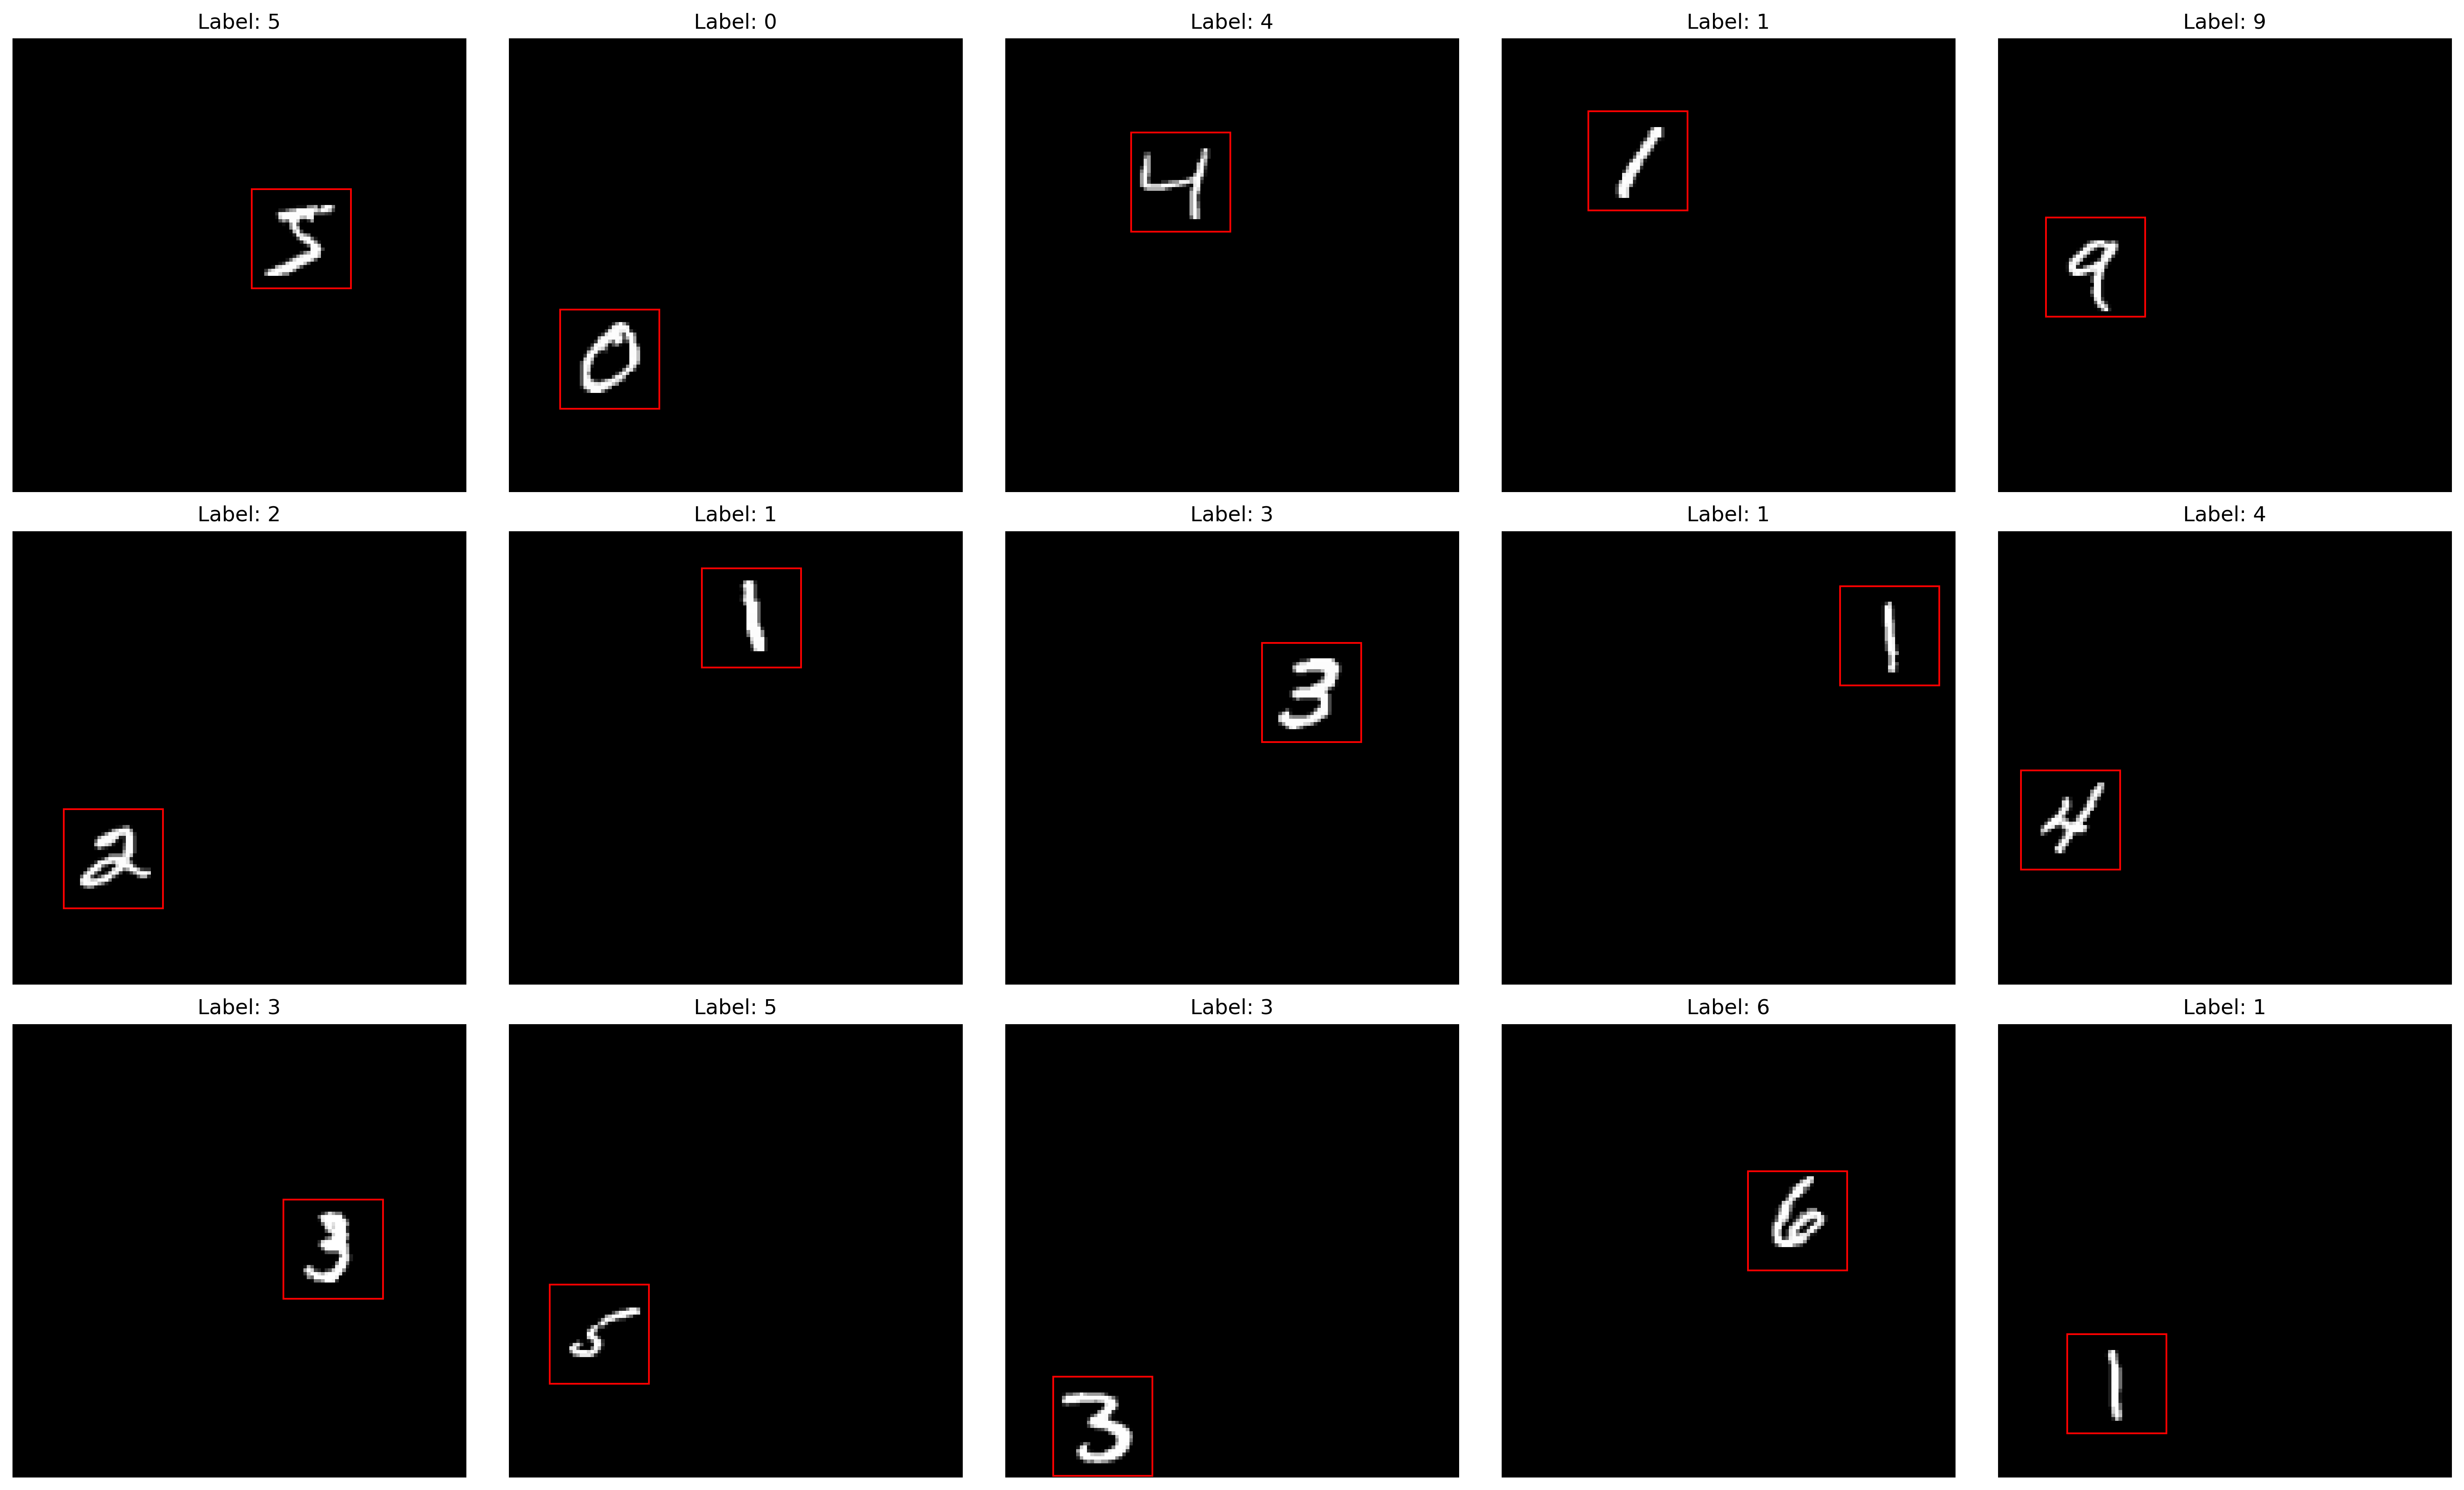

In [3]:
transform = transforms.ToTensor()
mnist_train = datasets.MNIST(root="data", train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_dataset = SytheticMNISTDataset(data=mnist_train.data, labels=mnist_train.targets)
val_dataset = SytheticMNISTDataset(data=mnist_test.data, labels=mnist_test.targets)

visualize_dataset_samples(dataset=train_dataset, num_samples=15, cols=5)

In [4]:
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, prefetch_factor=4, 
                              num_workers=os.cpu_count(), persistent_workers=os.cpu_count())
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=False, prefetch_factor=4, 
                            num_workers=os.cpu_count(), persistent_workers=os.cpu_count())


In [5]:
model = ObjectLocalizationModel(num_classes=10)
summary(model, input_size=(32, 1, 128, 128), col_names=["input_size", "output_size", "num_params", "params_percent", "trainable"],
        col_width=20)

Layer (type:depth-idx)                   Input Shape          Output Shape         Param #              Param %              Trainable
ObjectLocalizationModel                  [32, 1, 128, 128]    [32, 10]             --                        --              True
├─Sequential: 1-1                        [32, 1, 128, 128]    [32, 128, 8, 8]      --                        --              True
│    └─Sequential: 2-1                   [32, 1, 128, 128]    [32, 16, 64, 64]     --                        --              True
│    │    └─Conv2d: 3-1                  [32, 1, 128, 128]    [32, 16, 128, 128]   160                    0.01%              True
│    │    └─ReLU: 3-2                    [32, 16, 128, 128]   [32, 16, 128, 128]   --                        --              --
│    │    └─MaxPool2d: 3-3               [32, 16, 128, 128]   [32, 16, 64, 64]     --                        --              --
│    └─Sequential: 2-2                   [32, 16, 64, 64]     [32, 32, 32, 32]     --    

In [6]:
model=model.to(DEVICE)
opt = torch.optim.Adam(model.parameters(), lr=LR)
cls_loss_fn = torch.nn.CrossEntropyLoss()
loc_loss_fn = torch.nn.SmoothL1Loss()

In [7]:
history = model_fit(model=model.to(DEVICE),
                    train_loader=train_dataloader,
                    val_loader=val_dataloader,
                    optimizer=opt,
                    device=DEVICE,
                    loss_fns=[cls_loss_fn, loc_loss_fn],
                    loss_weights=[CLS_LOSS_WEIGHT, LOC_LOSS_WEIGHT],
                    epochs=EPOCHS)

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]


Epoch [1/5]


Training:   0%|          | 0/938 [00:00<?, ?it/s]

Validation:   0%|          | 0/157 [00:00<?, ?it/s]

Training Step | Loss: 0.7653 | Cls_loss: 0.6930 | Loc_loss: 0.0007 | Acc: 0.7673 | IoU: 0.6226
Validation Step | Loss: 0.1984 | Cls_loss: 0.1841 | Loc_loss: 0.0001 | Acc: 0.9456 | IoU: 0.7904
Best model saved with val_total_loss: 0.1984

Epoch [2/5]


Training:   0%|          | 0/938 [00:00<?, ?it/s]

Validation:   0%|          | 0/157 [00:00<?, ?it/s]

Training Step | Loss: 0.1308 | Cls_loss: 0.0937 | Loc_loss: 0.0004 | Acc: 0.9722 | IoU: 0.6931
Validation Step | Loss: 0.0991 | Cls_loss: 0.0864 | Loc_loss: 0.0001 | Acc: 0.9717 | IoU: 0.8009
Best model saved with val_total_loss: 0.0991

Epoch [3/5]


Training:   0%|          | 0/938 [00:00<?, ?it/s]

Validation:   0%|          | 0/157 [00:00<?, ?it/s]

Training Step | Loss: 0.1003 | Cls_loss: 0.0683 | Loc_loss: 0.0003 | Acc: 0.9798 | IoU: 0.7117
Validation Step | Loss: 0.0838 | Cls_loss: 0.0708 | Loc_loss: 0.0001 | Acc: 0.9775 | IoU: 0.7949
Best model saved with val_total_loss: 0.0838

Epoch [4/5]


Training:   0%|          | 0/938 [00:00<?, ?it/s]

Validation:   0%|          | 0/157 [00:00<?, ?it/s]

Training Step | Loss: 0.0843 | Cls_loss: 0.0562 | Loc_loss: 0.0003 | Acc: 0.9822 | IoU: 0.7274
Validation Step | Loss: 0.0639 | Cls_loss: 0.0567 | Loc_loss: 0.0001 | Acc: 0.9817 | IoU: 0.8452
Best model saved with val_total_loss: 0.0639

Epoch [5/5]


Training:   0%|          | 0/938 [00:00<?, ?it/s]

Validation:   0%|          | 0/157 [00:00<?, ?it/s]

Training Step | Loss: 0.0822 | Cls_loss: 0.0536 | Loc_loss: 0.0003 | Acc: 0.9832 | IoU: 0.7252
Validation Step | Loss: 0.0558 | Cls_loss: 0.0463 | Loc_loss: 0.0001 | Acc: 0.9847 | IoU: 0.8239
Best model saved with val_total_loss: 0.0558


In [8]:
with open("history.json", "w") as f:
    json.dump(history, f, indent=4)

### Training History

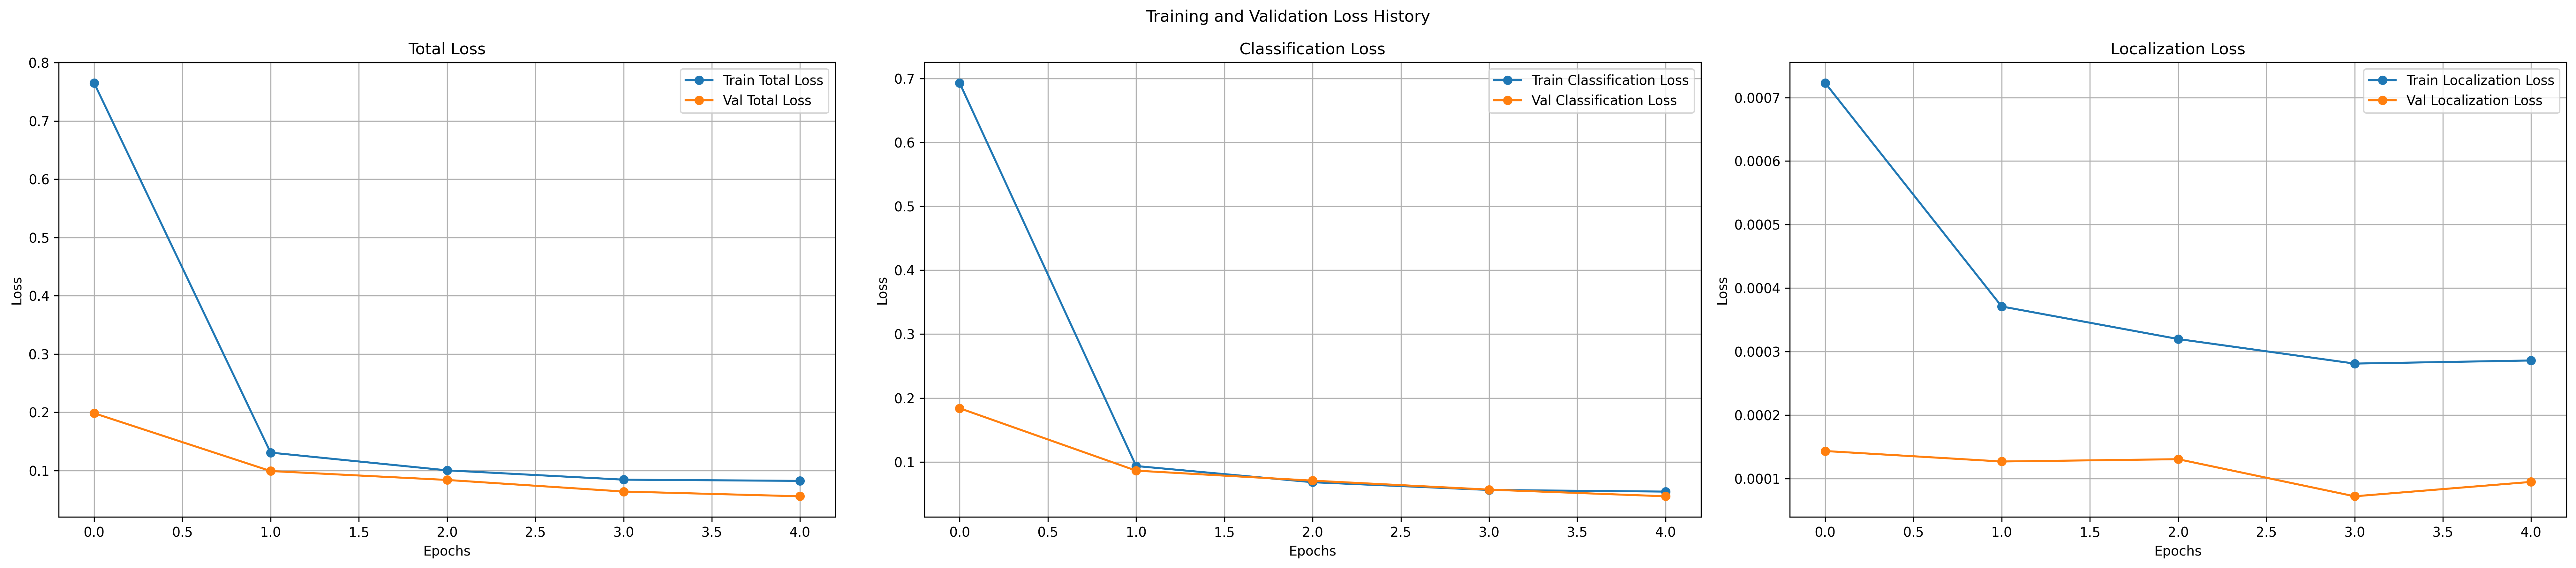

In [9]:
import json
import matplotlib.pyplot as plt

with open("history.json", "r") as f:
    history = json.load(f)

plt.figure(1, figsize=(27, 6), dpi=300)
plt.subplot(1, 3, 1)
plt.plot(history["train"]["total_loss"], "o-", label="Train Total Loss")
plt.plot(history["val"]["total_loss"], "o-", label="Val Total Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Total Loss")
plt.grid()
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history["train"]["cls_loss"], "o-", label="Train Classification Loss")
plt.plot(history["val"]["cls_loss"], "o-", label="Val Classification Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Classification Loss")
plt.grid()
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history["train"]["loc_loss"], "o-", label="Train Localization Loss")
plt.plot(history["val"]["loc_loss"], "o-", label="Val Localization Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Localization Loss")
plt.grid()
plt.legend()

plt.suptitle("Training and Validation Loss History")
plt.tight_layout()
plt.savefig("training_loss_history.png")
plt.show()

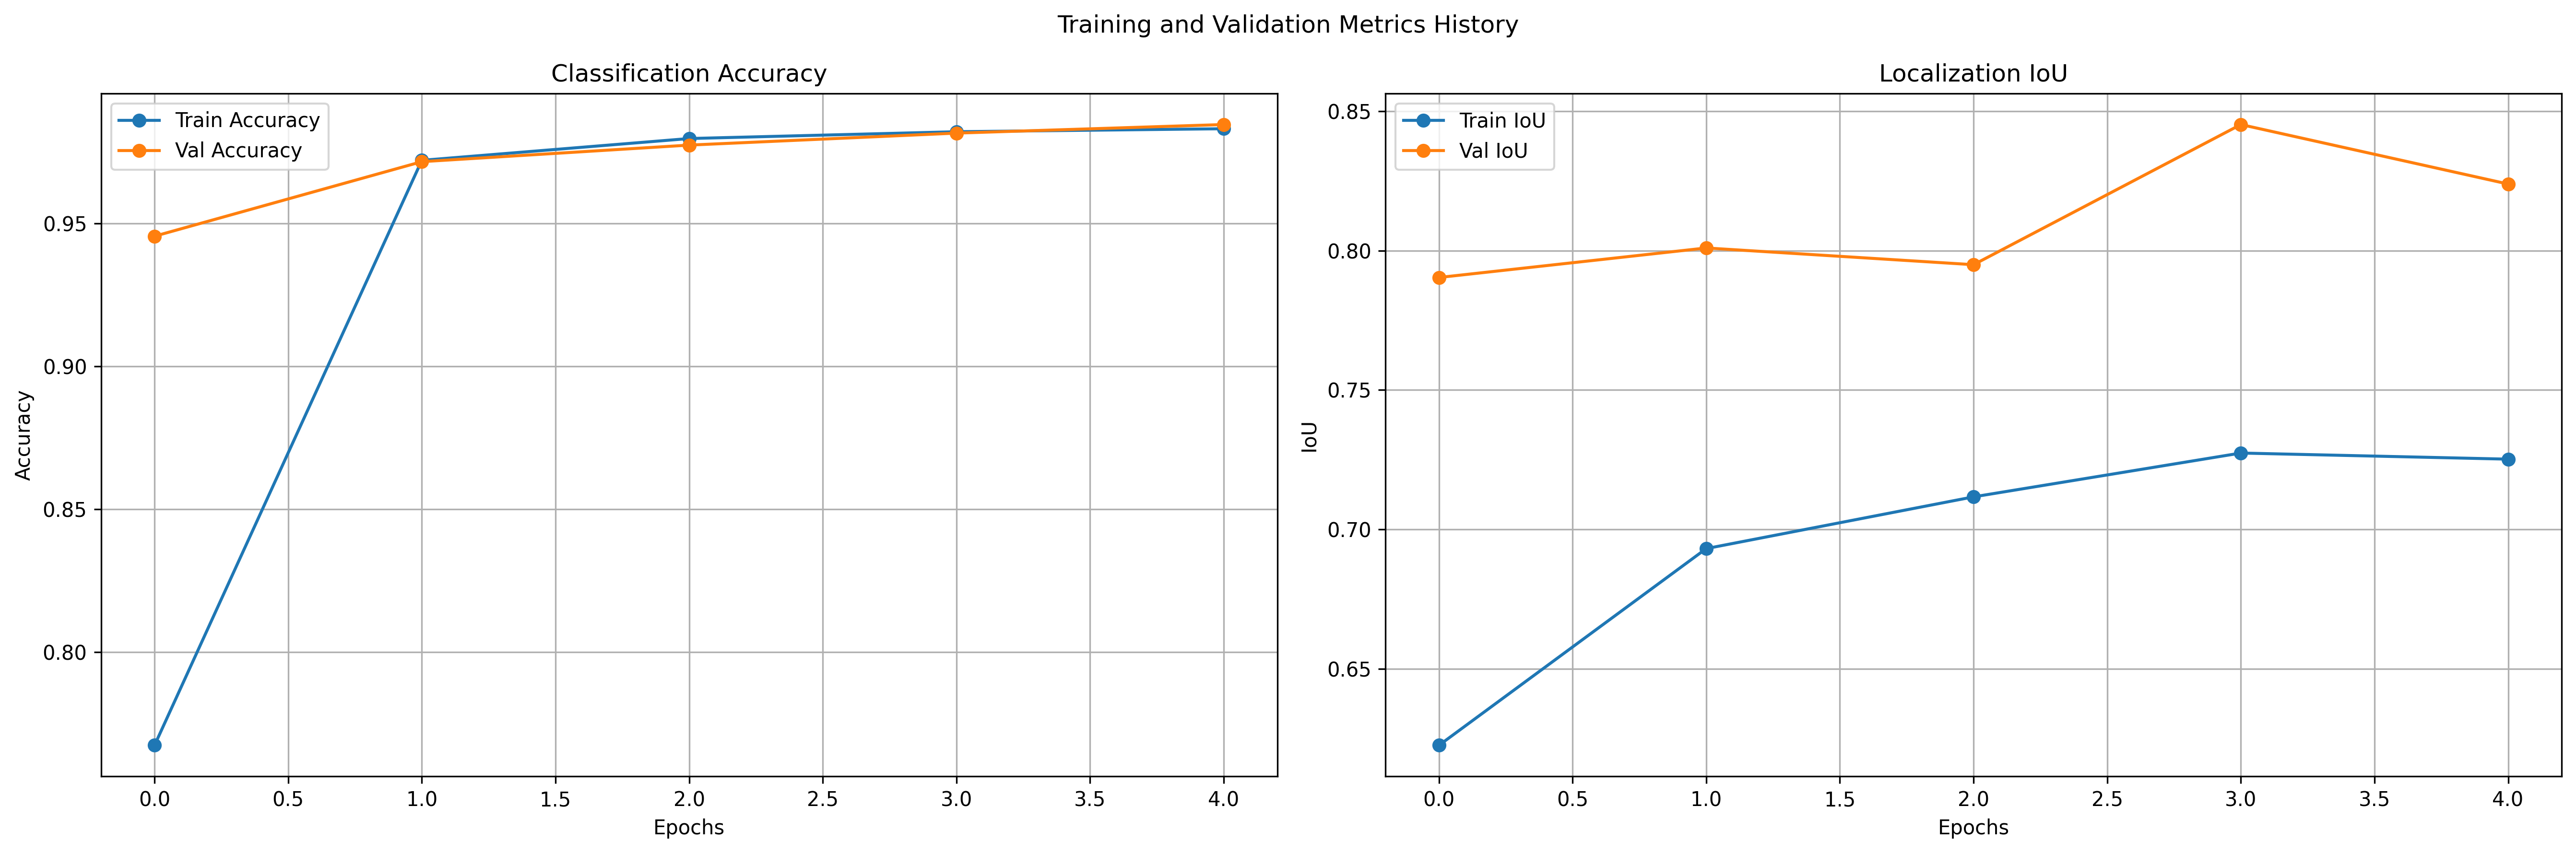

In [10]:
plt.figure(2, figsize=(18, 6), dpi=300)

plt.subplot(121)
plt.plot(history["train"]["accuracy"], "o-", label="Train Accuracy")
plt.plot(history["val"]["accuracy"], "o-", label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy")
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(history["train"]["iou"], "o-", label="Train IoU")
plt.plot(history["val"]["iou"], "o-", label="Val IoU")
plt.xlabel("Epochs")
plt.ylabel("IoU")
plt.title("Localization IoU")
plt.grid()
plt.legend()

plt.suptitle("Training and Validation Metrics History")
plt.tight_layout()
plt.savefig("training_metrics_history.png")
plt.show()

### Prediction on Test Set

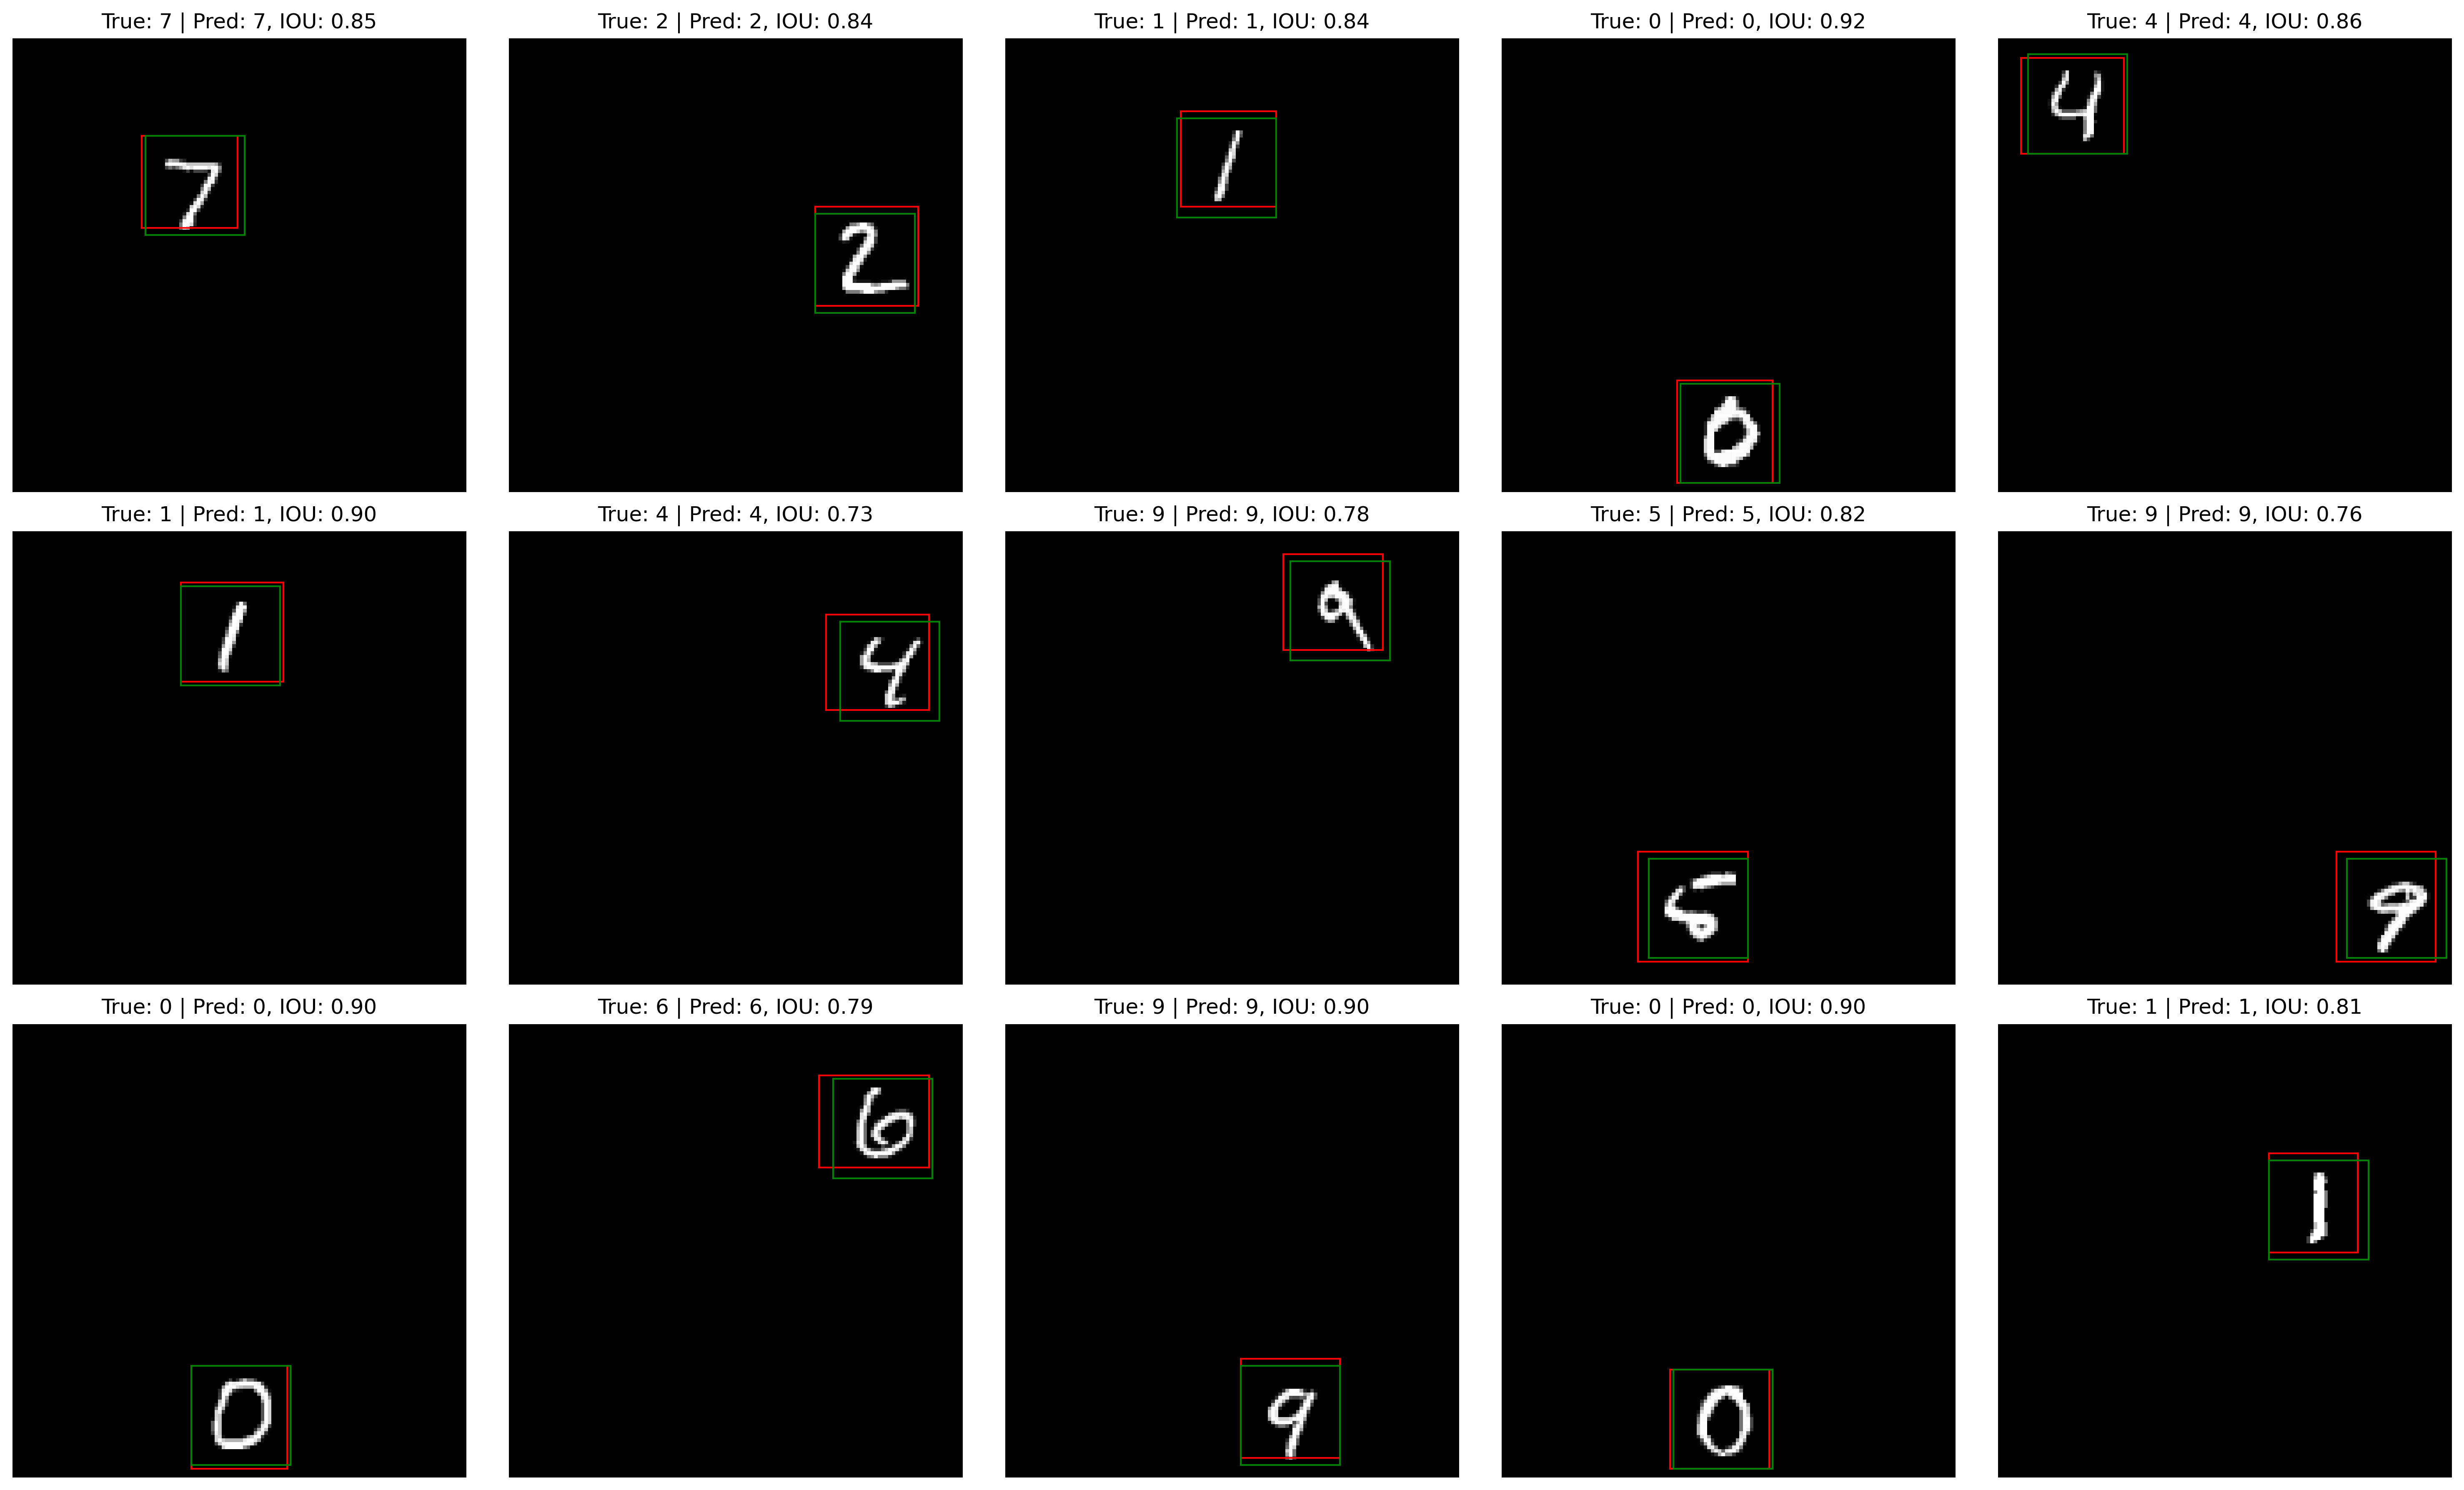

In [11]:
import torch
from torchvision import datasets, transforms

from data_utils import SytheticMNISTDataset
from viz_utils import visualize_predictions_on_dataset
from model import ObjectLocalizationModel

model = ObjectLocalizationModel(num_classes=10).to(torch.device("cpu"))
model.load_state_dict(torch.load("best_model.pth", map_location=torch.device("cpu")))

transform = transforms.ToTensor()
mnist_test = datasets.MNIST(root="data", train=False, download=True, transform=transform)
val_dataset = SytheticMNISTDataset(data=mnist_test.data, labels=mnist_test.targets)

visualize_predictions_on_dataset(model=model, dataset=val_dataset, device=torch.device("cpu"), num_samples=15, cols=5)